In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_test=pd.read_csv("test.csv")

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
data=pd.concat([df,df_test],axis=0,sort=True)

In [7]:
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

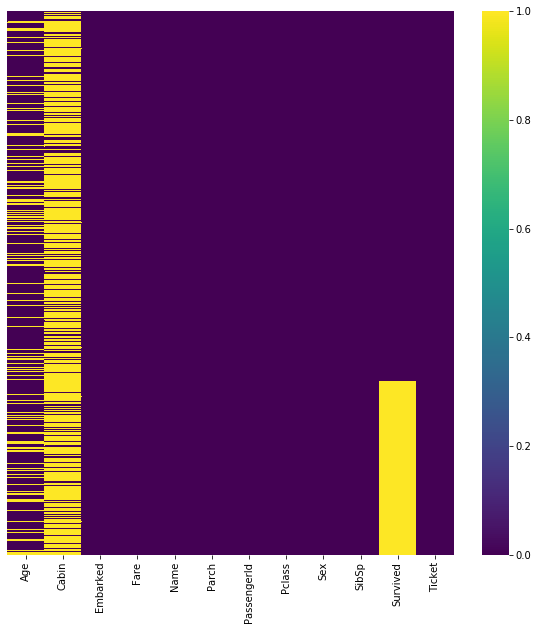

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [11]:
#Cabin has too much null values its better to drop it
data.drop("Cabin",axis=1,inplace=True)

In [12]:
#finding correlation between various columns
data.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


In [13]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
#filling the missing values in embarked
mode_1=df["Embarked"].mode()[0]
df["Embarked"].fillna(mode_1,inplace=True)

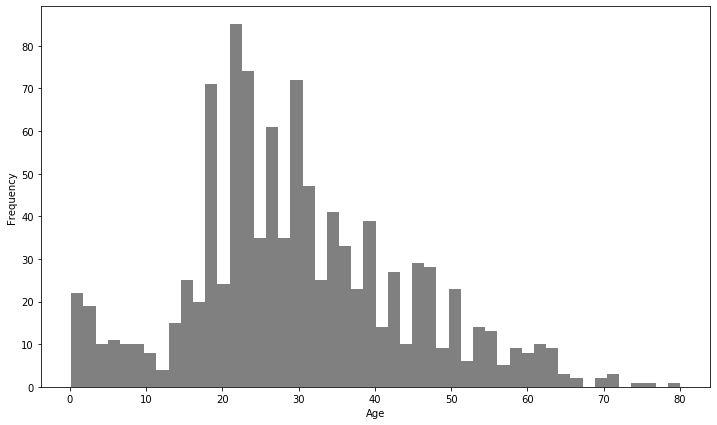

In [15]:
#Plotting the barplot graph of Age
plt.figure(figsize=(12,7))
plt.xlabel("Age")
data["Age"].plot(kind="hist",bins=50,color="grey")

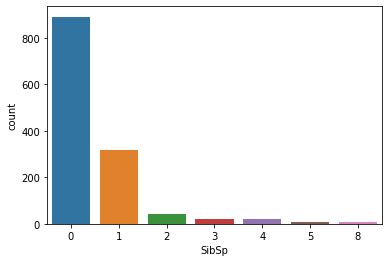

In [16]:
#This plot clearly states that most passengers had no siblings
sns.countplot(x="SibSp",data=data)

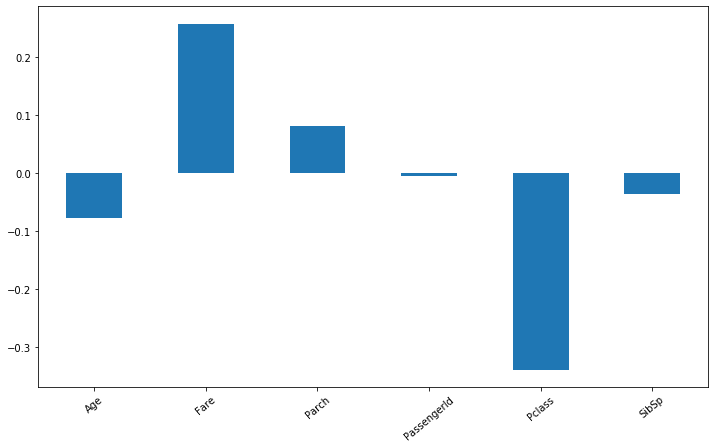

In [17]:
plt.figure(figsize=(12,7))
corr=data.drop("Survived",axis=1).corrwith(data["Survived"])
corr.plot(kind="bar",rot=40)

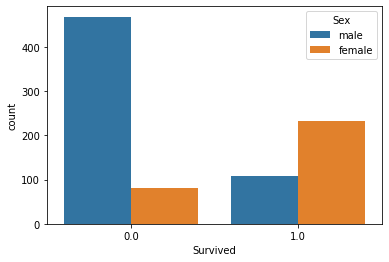

In [18]:
#finding which gender does the most survivors belong to
sns.countplot(x="Survived",data=data,hue="Sex")
#It clearly indicates most survivors were females

Text(0, 0.5, 'PASSENGERS')

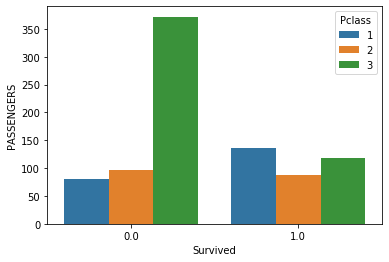

In [19]:
sns.countplot("Survived",data=data,hue="Pclass")
plt.ylabel("PASSENGERS")
#The graph indicates that most survivors mostly belonged to Pclass 1

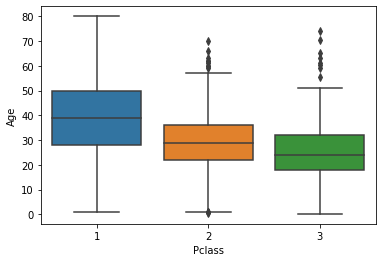

In [20]:
#This boxplot graph depicts the age groups of passenger class
sns.boxplot(x="Pclass",y="Age",data=data)

In [21]:
#Since the age groups are clearly shown in the above graph it is suitable to fill null values of ages via these classes
def impute_age(cols):
    Pclass=cols[0]
    Age=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 39
        elif Pclass==2:
            return 28
        else:
            return 22
    else:
        return Age
        
        

In [22]:
data["Age"]=data[["Pclass","Age"]].apply(impute_age,axis=1)

In [23]:
data["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [24]:
data["Title"]=data["Name"].str.split(",").str[1].str.split(".").str[0].str.strip()

In [25]:
data["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [26]:
title_map={
    "Don":"VIP",
    "Miss":"Miss",
    "Master":"Mr",
    "Rev":"Staff",
    "Dr":"Staff",
    "Mme":"Miss",
    "Ms":"Miss",
    "Major":"VIP",
    "Lady":"Miss",
    "Sir":"Mr",
    "Mlle":"Miss",
    "Col":"Staff",
    "Capt":"Staff",
    "the Countess":"VIP",
    "Jonkheer":"VIP",
    "Dona":"VIP",
    "Mr":"Mr",
    "Mrs":"Mrs"
}

In [27]:
data["Title"]=data["Title"].map(title_map)

In [28]:
data.drop("Name",axis=1,inplace=True)

In [29]:
data.head(5)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,S,7.2500,0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,S,53.1000,0,4,1,female,1,1.0,113803,Mrs
4,35.0,S,8.0500,0,5,3,male,0,0.0,373450,Mr


In [30]:
#Further Feature Engineering of the data


In [31]:
data["mother"]=np.where((data.Title=="Mrs")& (data.Parch>0),1,0)

In [32]:
data["Free"]=np.where(data.Fare==0,1,0)

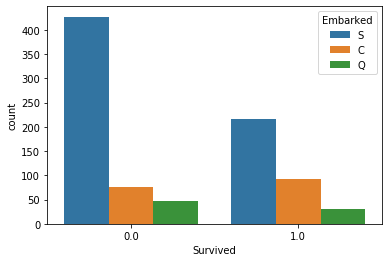

In [33]:
sns.countplot("Survived",data=data,hue="Embarked")
#It can be seen from the below graph that the lowest number of survivors are from Queenstown

In [34]:
#Extracting the numbers from the ticket column 
data["Unique_Numbers"]=data["Ticket"].str.split(" ").str[-1].str.strip()

In [35]:
#Replacing the only string in the Unique_Numbers column with 0

In [36]:
data["Unique_Numbers"].replace("LINE","0",inplace=True)

In [37]:
#Converting the string to integer values
data["Unique_Numbers"]=pd.to_numeric(data["Unique_Numbers"])

In [38]:
data["Unique_Numbers"]

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
413       3236
414      17758
415    3101262
416     359309
417       2668
Name: Unique_Numbers, Length: 1309, dtype: int64

In [39]:
data.head(5)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,mother,Free,Unique_Numbers
0,22.0,S,7.2500,0,1,3,male,1,0.0,A/5 21171,Mr,0,0,21171
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,Mrs,0,0,17599
2,26.0,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,0,3101282
3,35.0,S,53.1000,0,4,1,female,1,1.0,113803,Mrs,0,0,113803
4,35.0,S,8.0500,0,5,3,male,0,0.0,373450,Mr,0,0,373450


In [40]:
data.drop("Ticket",axis=1,inplace=True)

In [41]:
data.head(5)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,mother,Free,Unique_Numbers
0,22.0,S,7.2500,0,1,3,male,1,0.0,Mr,0,0,21171
1,38.0,C,71.2833,0,2,1,female,1,1.0,Mrs,0,0,17599
2,26.0,S,7.9250,0,3,3,female,0,1.0,Miss,0,0,3101282
3,35.0,S,53.1000,0,4,1,female,1,1.0,Mrs,0,0,113803
4,35.0,S,8.0500,0,5,3,male,0,0.0,Mr,0,0,373450


In [42]:
data["Sex"]=data["Sex"].map({"male":1,"female":0})

In [43]:
data.head(5)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,mother,Free,Unique_Numbers
0,22.0,S,7.2500,0,1,3,1,1,0.0,Mr,0,0,21171
1,38.0,C,71.2833,0,2,1,0,1,1.0,Mrs,0,0,17599
2,26.0,S,7.9250,0,3,3,0,0,1.0,Miss,0,0,3101282
3,35.0,S,53.1000,0,4,1,0,1,1.0,Mrs,0,0,113803
4,35.0,S,8.0500,0,5,3,1,0,0.0,Mr,0,0,373450


In [44]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [45]:
data.isnull().sum()

Age                 0
Embarked            2
Fare                1
Parch               0
PassengerId         0
Pclass              0
Sex                 0
SibSp               0
Survived          418
Title               0
mother              0
Free                0
Unique_Numbers      0
dtype: int64

In [46]:
#filling the missing value in the embarked column with mode
mode_1=data["Embarked"].mode()[0]
data["Embarked"].fillna(mode_1,inplace=True)

In [47]:
data.isnull().sum()

Age                 0
Embarked            0
Fare                1
Parch               0
PassengerId         0
Pclass              0
Sex                 0
SibSp               0
Survived          418
Title               0
mother              0
Free                0
Unique_Numbers      0
dtype: int64

In [48]:
#Filling the fare column missing value with mean 
mean_1=data["Fare"].mean()
data["Fare"].fillna(mean_1,inplace=True)

In [49]:
data.isnull().sum()

Age                 0
Embarked            0
Fare                0
Parch               0
PassengerId         0
Pclass              0
Sex                 0
SibSp               0
Survived          418
Title               0
mother              0
Free                0
Unique_Numbers      0
dtype: int64

In [50]:
#data.drop("PassengerId",axis=1,inplace=True)

In [51]:
data.head(5)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,mother,Free,Unique_Numbers
0,22.0,S,7.2500,0,1,3,1,1,0.0,Mr,0,0,21171
1,38.0,C,71.2833,0,2,1,0,1,1.0,Mrs,0,0,17599
2,26.0,S,7.9250,0,3,3,0,0,1.0,Miss,0,0,3101282
3,35.0,S,53.1000,0,4,1,0,1,1.0,Mrs,0,0,113803
4,35.0,S,8.0500,0,5,3,1,0,0.0,Mr,0,0,373450


In [52]:
#Converting the categorical values of embarked into numeric values
data["Embarked"]=data["Embarked"].map({"S":0,"C":1,"Q":2})

In [53]:
data.head(5)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,mother,Free,Unique_Numbers
0,22.0,0,7.2500,0,1,3,1,1,0.0,Mr,0,0,21171
1,38.0,1,71.2833,0,2,1,0,1,1.0,Mrs,0,0,17599
2,26.0,0,7.9250,0,3,3,0,0,1.0,Miss,0,0,3101282
3,35.0,0,53.1000,0,4,1,0,1,1.0,Mrs,0,0,113803
4,35.0,0,8.0500,0,5,3,1,0,0.0,Mr,0,0,373450


In [54]:
# Mapping Fare
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3
data['Fare'] = data['Fare'].astype(int)

# Mapping Age
data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age'] = 4 ;

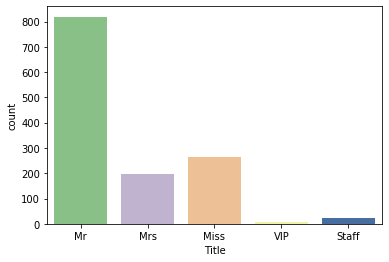

In [55]:
#creating a count plot of title to assess which specific category was most present in the ship
sns.countplot("Title",data=data,palette="Accent")

In [56]:
data["Title"]=data["Title"].map({"Mr":0,"Mrs":1,"Miss":2,"VIP":3,"Staff":4})

In [57]:
data.isnull().sum()

Age                 0
Embarked            0
Fare                0
Parch               0
PassengerId         0
Pclass              0
Sex                 0
SibSp               0
Survived          418
Title               0
mother              0
Free                0
Unique_Numbers      0
dtype: int64

In [58]:
data.head(5)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,mother,Free,Unique_Numbers
0,1.0,0,0,0,1,3,1,1,0.0,0,0,0,21171
1,2.0,1,3,0,2,1,0,1,1.0,1,0,0,17599
2,1.0,0,1,0,3,3,0,0,1.0,2,0,0,3101282
3,2.0,0,3,0,4,1,0,1,1.0,1,0,0,113803
4,2.0,0,1,0,5,3,1,0,0.0,0,0,0,373450


In [59]:
df=pd.DataFrame(data[:891:])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
Age               891 non-null float64
Embarked          891 non-null int64
Fare              891 non-null int32
Parch             891 non-null int64
PassengerId       891 non-null int64
Pclass            891 non-null int64
Sex               891 non-null int64
SibSp             891 non-null int64
Survived          891 non-null float64
Title             891 non-null int64
mother            891 non-null int32
Free              891 non-null int32
Unique_Numbers    891 non-null int64
dtypes: float64(2), int32(3), int64(8)
memory usage: 87.0 KB


In [61]:
df_test=pd.DataFrame(data[891::])

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 13 columns):
Age               418 non-null float64
Embarked          418 non-null int64
Fare              418 non-null int32
Parch             418 non-null int64
PassengerId       418 non-null int64
Pclass            418 non-null int64
Sex               418 non-null int64
SibSp             418 non-null int64
Survived          0 non-null float64
Title             418 non-null int64
mother            418 non-null int32
Free              418 non-null int32
Unique_Numbers    418 non-null int64
dtypes: float64(2), int32(3), int64(8)
memory usage: 40.8 KB


In [63]:
df_test.head(5)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,mother,Free,Unique_Numbers
0,2.0,2,0,0,892,3,1,0,NaN,0,0,0,330911
1,2.0,0,0,0,893,3,0,1,NaN,1,0,0,363272
2,3.0,2,1,0,894,2,1,0,NaN,0,0,0,240276
3,1.0,0,1,0,895,3,1,0,NaN,0,0,0,315154
4,1.0,0,1,1,896,3,0,1,NaN,1,1,0,3101298


In [64]:
df_test.drop("Survived",axis=1,inplace=True)

In [65]:
df_test.head(5)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Title,mother,Free,Unique_Numbers
0,2.0,2,0,0,892,3,1,0,0,0,0,330911
1,2.0,0,0,0,893,3,0,1,1,0,0,363272
2,3.0,2,1,0,894,2,1,0,0,0,0,240276
3,1.0,0,1,0,895,3,1,0,0,0,0,315154
4,1.0,0,1,1,896,3,0,1,1,1,0,3101298


In [66]:
X=df.drop("Survived",axis=1)

In [67]:
y=df["Survived"]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
#Using kfold cross validation
from sklearn.model_selection import KFold, cross_val_predict
kf = KFold(shuffle=True, random_state=42, n_splits=3)
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_features= 'sqrt',
 max_depth= 70,
 bootstrap= True)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=70, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=400)

In [71]:
pred_1=rfc.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred_1))
print(confusion_matrix(y_test,pred_1))

0.8080808080808081
[[171  16]
 [ 41  69]]


In [73]:
#hyperparameters of random forest to be fine tuned
param_grids={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [74]:
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier(learning_rate=0.001,n_estimators=2500,
                                max_depth=4, min_child_weight=0,
                                gamma=0, subsample=0.7,
                                colsample_bytree=0.7,
                                scale_pos_weight=1, seed=27,
                                reg_alpha=0.00006)
xgb.fit(X_train,y_train)
predict_12=xgb.predict(X_test)
print(confusion_matrix(y_test,predict_12))


[[170  17]
 [ 40  70]]


In [75]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predict_14=dtree.predict(X_test)
print(confusion_matrix(y_test,predict_14))

[[152  35]
 [ 39  71]]


In [76]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(base_estimator=rfc,n_estimators=200,learning_rate=0.0001)
ad.fit(X_train,y_train)
predict_5=ad.predict(X_test)
print(accuracy_score(y_test,predict_5))

0.8080808080808081


In [77]:
print(confusion_matrix(y_test,predict_5))

[[170  17]
 [ 40  70]]


In [78]:
predicting=rfc.predict(df_test).astype(int)

In [79]:
submission=pd.DataFrame({"PassengerId":df_test["PassengerId"],"Survived":predicting})

In [80]:
print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [81]:
submission=submission.set_index("PassengerId")

In [82]:
print(submission)

             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 0
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]


In [83]:
submission.to_csv("mashood_titanic.csv")